In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

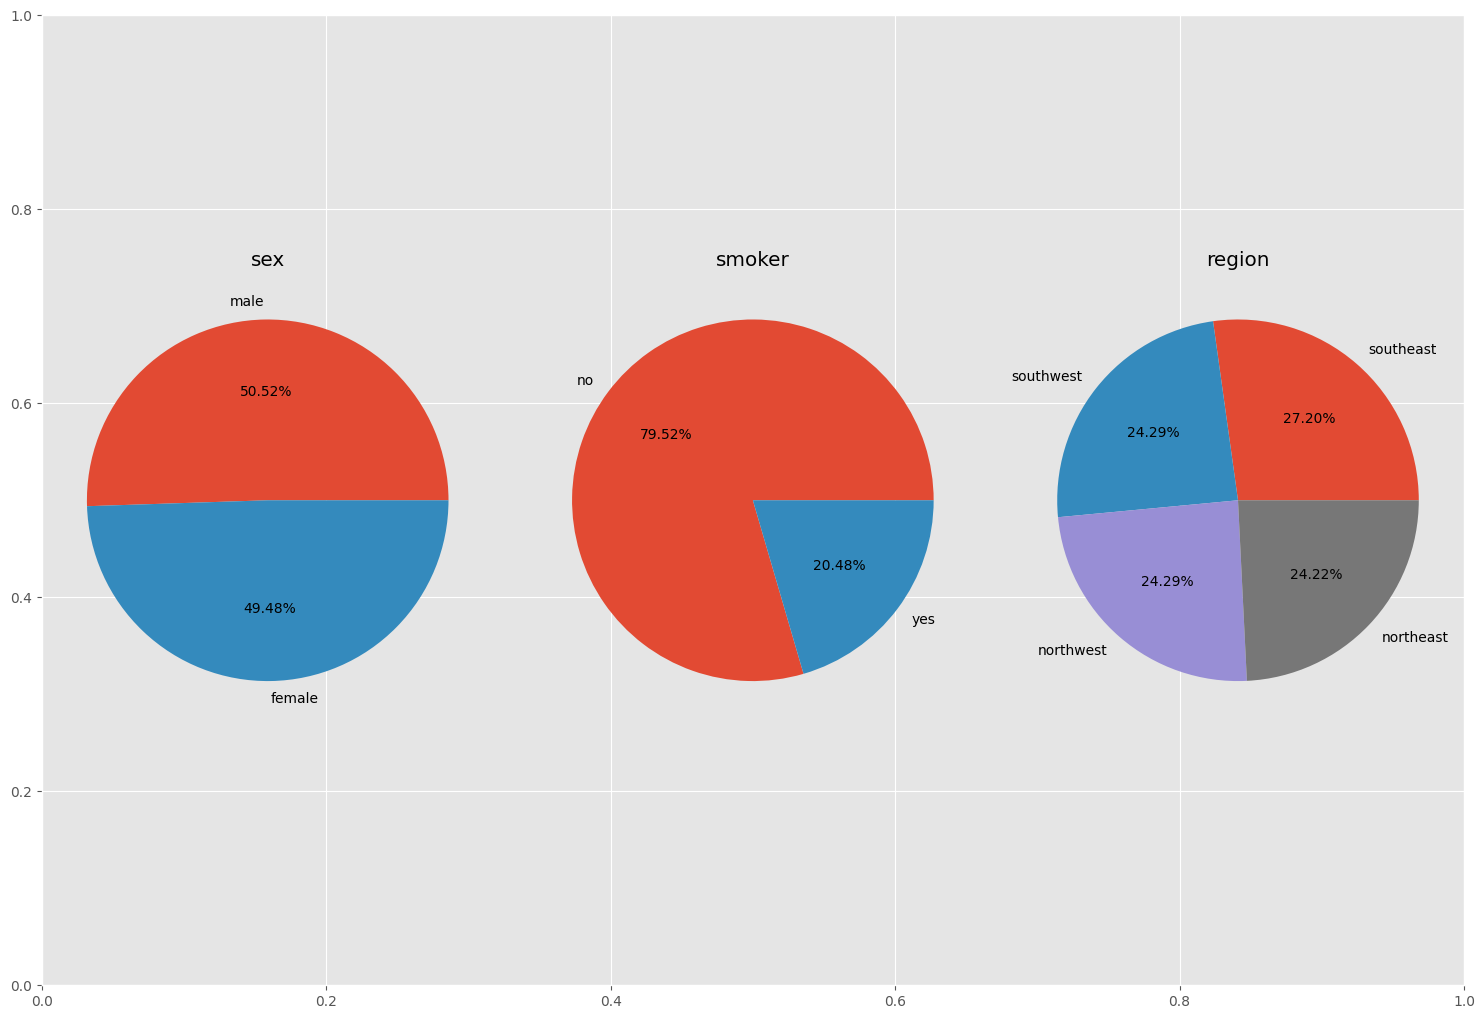

In [ ]:
features=['sex','smoker','region']
plt.subplots(figsize=(15,10))
for i,feature in enumerate(features):
    plt.subplot(1,3,i+1)

    x=df[feature].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.2f%%')
    plt.title(feature)
plt.tight_layout()

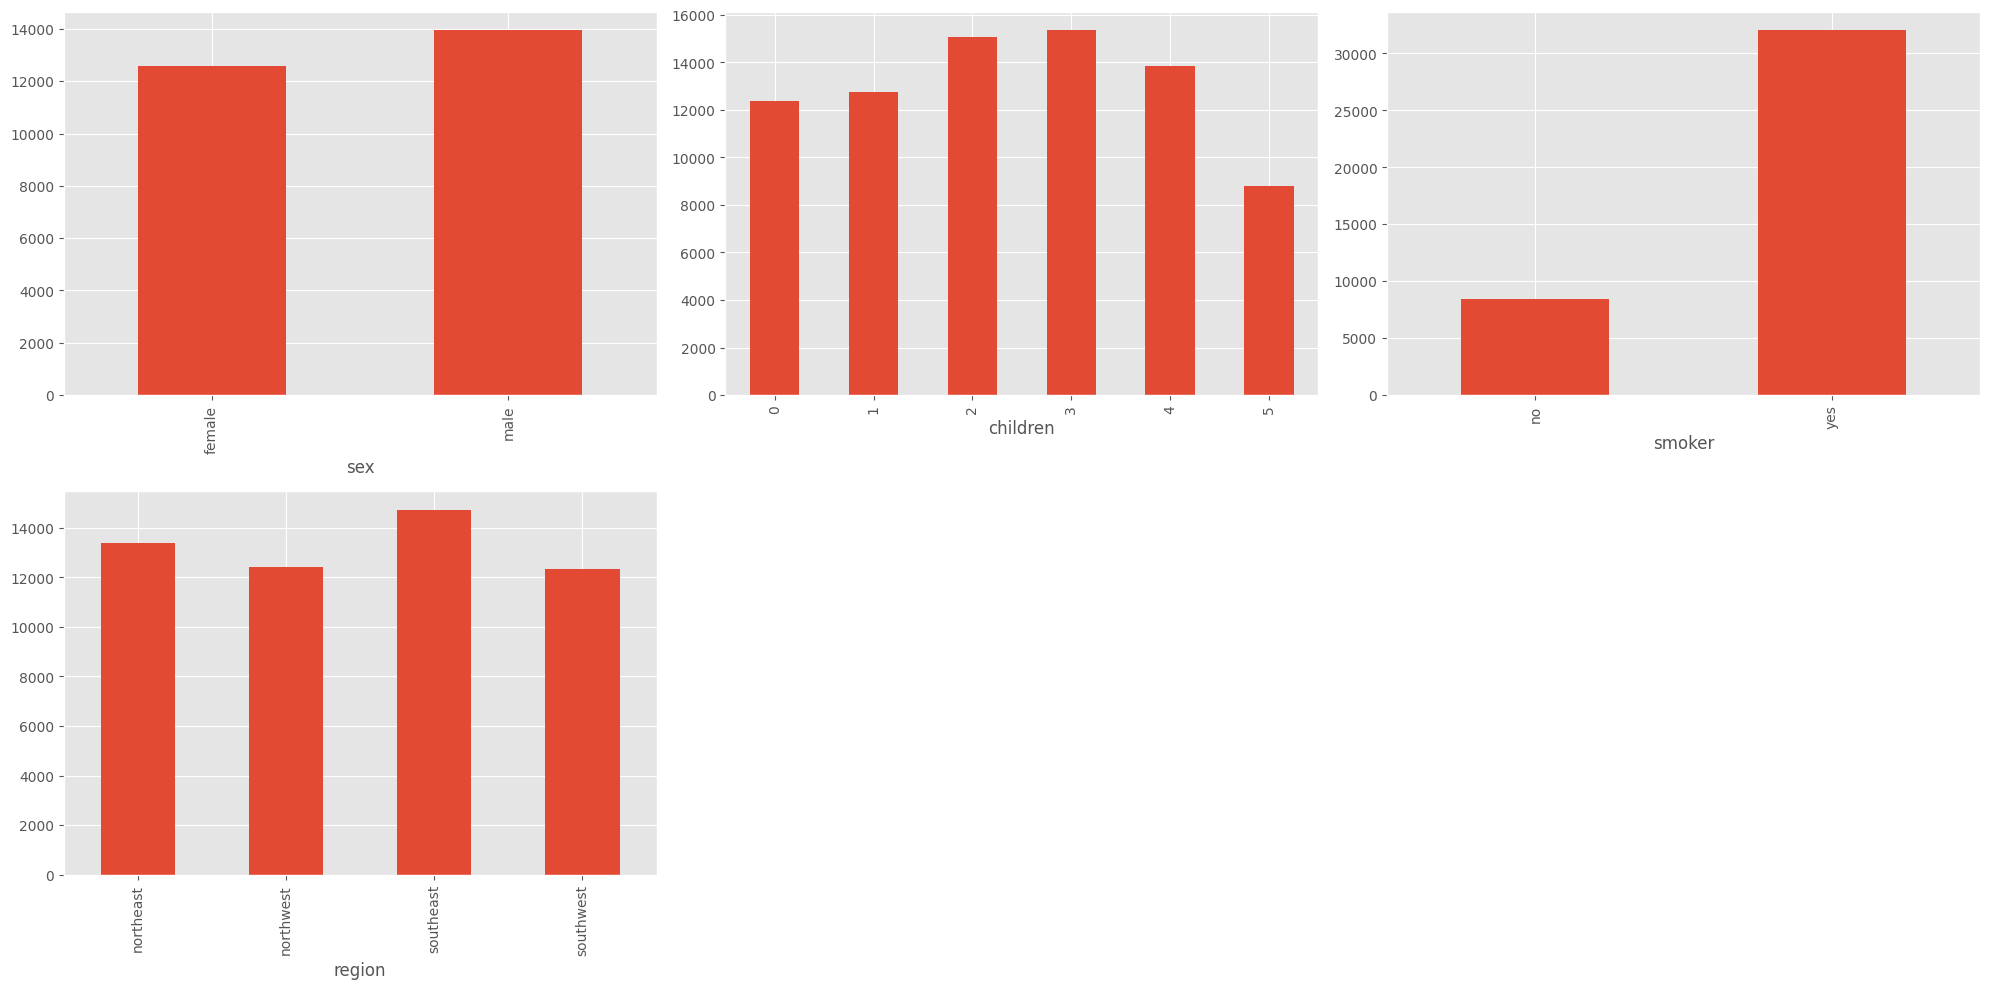

In [ ]:
features=['sex','children','smoker','region']

plt.figure(figsize=(20,10)) # Create a figure with the desired size

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  df.groupby(col)['charges'].mean().astype(float).plot.bar()
  # sns.countplot(df[col])
  # plt.title(col)
plt.tight_layout()

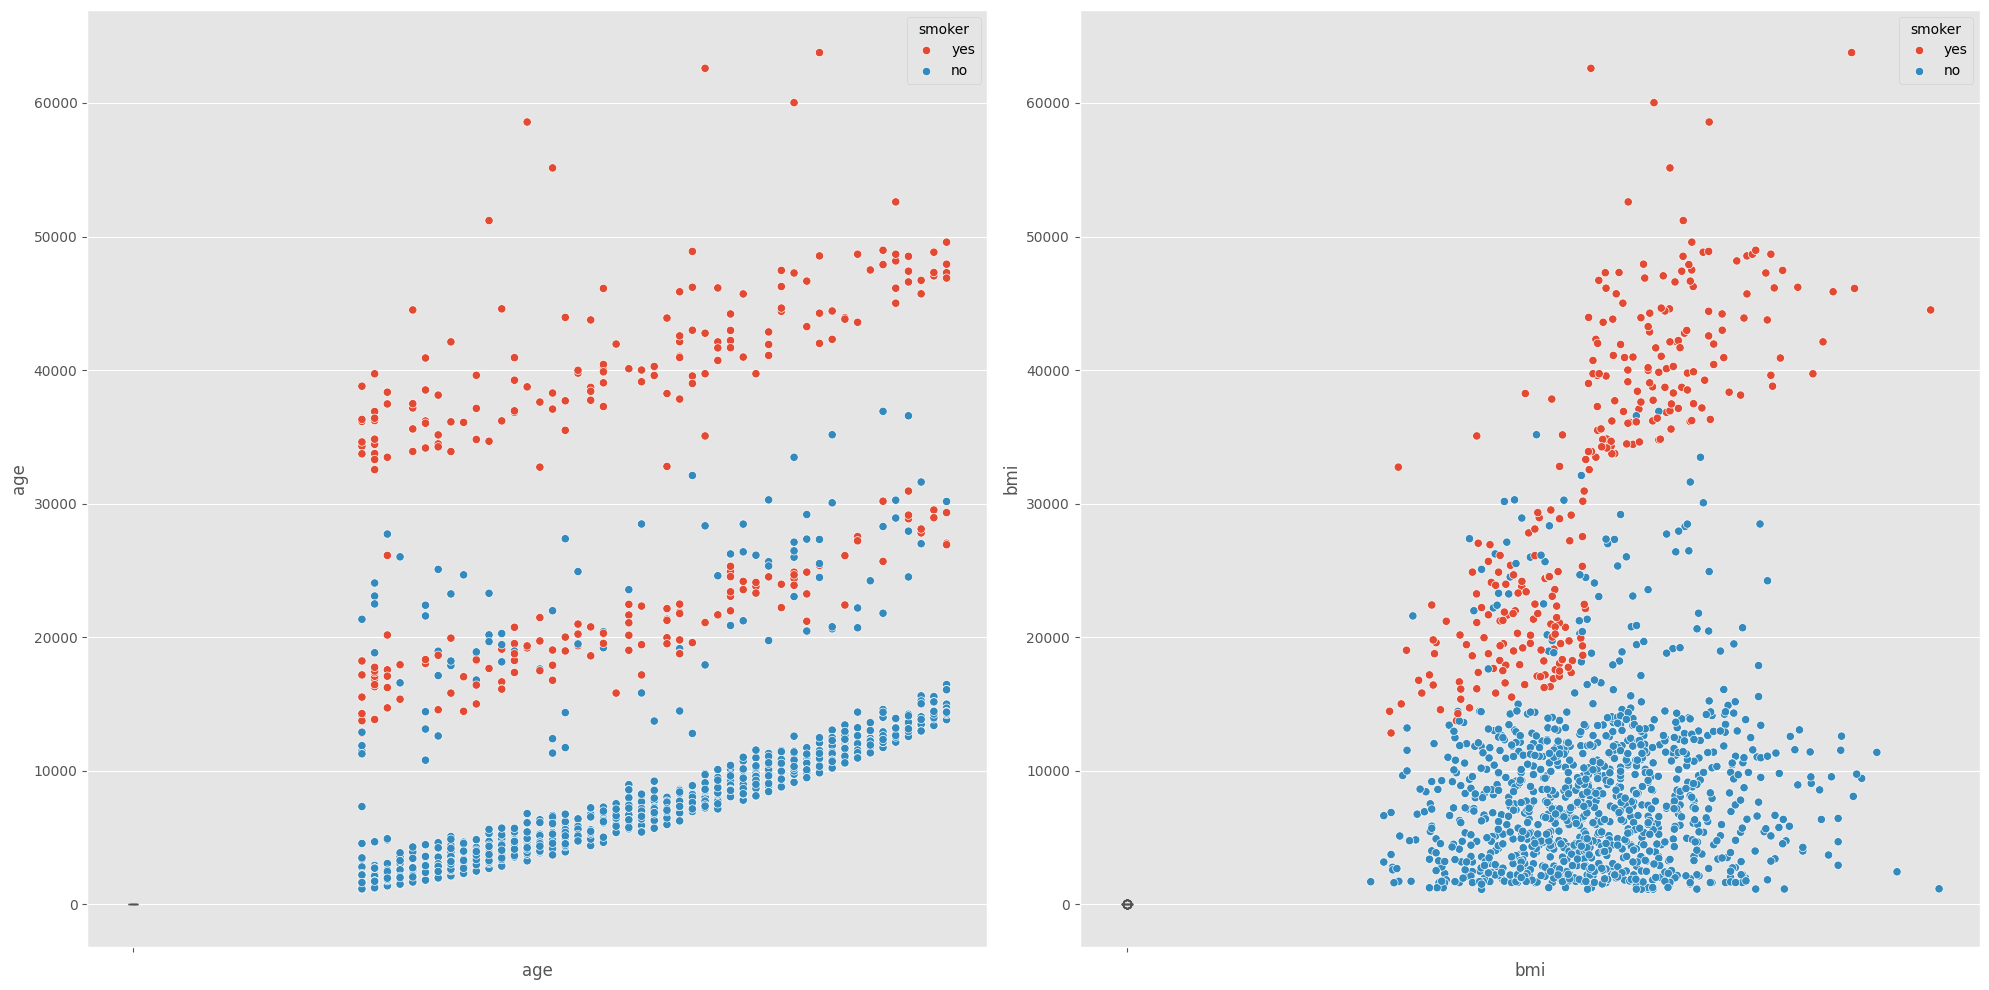

In [ ]:
features=['age','bmi']

plt.figure(figsize=(20,10)) # Create a figure with the desired size

for i, col in enumerate(features):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col])
  sns.scatterplot(data=df,x=col,y='charges',hue='smoker')
plt.tight_layout()

In [ ]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

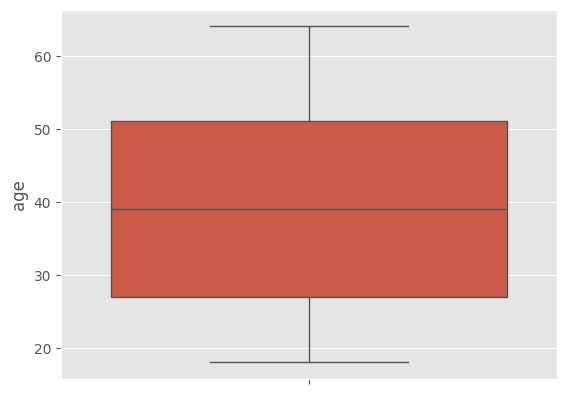

In [ ]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

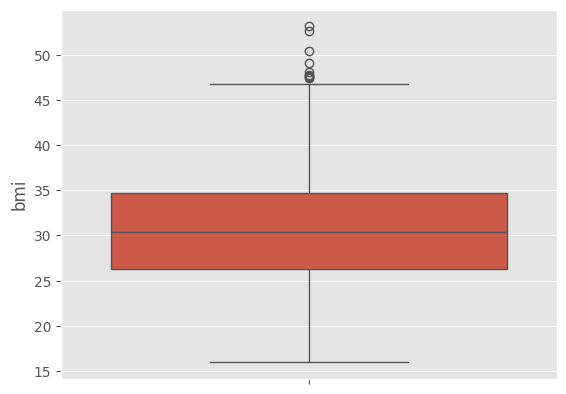

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

13.674999999999994
47.31500000000001


In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi': 13.674999999999994},max_capping_dict={'bmi': 47.31500000000001})

df[['bmi']]=arb.fit_transform(df[['bmi']])

In [ ]:
!pip install feature_engine

In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi': 13.674999999999994},max_capping_dict={'bmi': 47.31500000000001})

df[['bmi']]=arb.fit_transform(df[['bmi']])

<Axes: ylabel='bmi'>

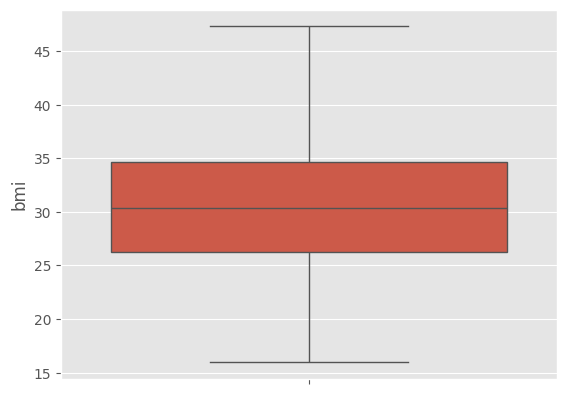

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

In [ ]:
df['bmi'].skew()

np.float64(0.23289153320569836)

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region']=df['region'].map({'northwest':0,'northeast':1,'southwest':2,'southeast':3})

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.261154,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261154,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.056070,1.000000


In [ ]:
X= df.drop(['charges'],axis=1)
y=df['charges']

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [ ]:
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  l1.append(lr.score(X_train,y_train))
  l2.append(lr.score(X_test,y_test))
  cvs=cross_val_score(lr,X,y,cv=5).mean()
  l3.append(cvs)
  df1=pd.DataFrame({'Train_Score':l1,'Test_Score':l2,'Cross_Val':l3})


In [ ]:
df1

,Train_Score,Test_Score,Cross_Val
0,0.741539,0.779138,0.747
1,0.756756,0.704260,0.747
2,0.729648,0.806362,0.747
3,0.753997,0.734113,0.747
4,0.742804,0.780840,0.747
5,0.753137,0.732727,0.747
6,0.741612,0.775969,0.747
7,0.732525,0.794691,0.747
8,0.751989,0.741911,0.747
9,0.756583,0.721869,0.747


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(cross_val_score(lr,X,y,cv=5).mean())


0.7565832811735773
0.7218693625812024
0.7469996197062543


In [ ]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(X_train,y_train)
ypredtrain1=svrmodel.predict(X_train)
ypredtest1=svrmodel.predict(X_test)


In [ ]:
print(r2_score(y_train,ypredtrain1))
print(r2_score(y_test,ypredtest1))
print(cross_val_score(svrmodel,X,y,cv=5).mean())

-0.09789752520877815
-0.15287753777870372
-0.10374692104571026


In [ ]:
rfmodel=RandomForestRegressor()
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)


In [ ]:
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5).mean())

0.975594525632415
0.8493925872911425
0.8363432887585389


In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,120,150]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 150}


In [ ]:
rfmodel=RandomForestRegressor(n_estimators=150)
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)


In [ ]:
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5).mean())

0.9769000032438289
0.8502691433863384
0.8358425912878568


In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=20,learning_rate=0.2)
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5).mean())

{'learning_rate': 0.19, 'n_estimators': 20}
0.8800134075952027
0.866992784761933
0.8608708282212236


In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5).mean())

0.9947513360955295
0.7959930997899167
0.8080768178656615


In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
xgmodel=XGBRegressor(n_estimators=50,max_depth=3,gamma=0.15)
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5).mean())

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8558333120841499
0.9076885151026941
0.8555889204315898
0.85142757206984


In [ ]:
features_important=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])

In [ ]:
features_important

,Importance
age,0.038291
sex,0.003500
bmi,0.107480
children,0.011483
smoker,0.834993
region,0.004254


In [ ]:
important_features=features_important[features_important['Importance']>0.01]

In [ ]:
important_features

,Importance
age,0.038291
bmi,0.107480
children,0.011483
smoker,0.834993


In [ ]:
df.drop(['sex','region'],axis=1,inplace=True)
X=df.drop(['charges'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
finalmodel=XGBRegressor(n_estimators=50,max_depth=3,gamma=0.15)
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5).mean())

0.893777775469393
0.8920423745393359
0.852435928538908


In [ ]:
import pickle
pickle.dump(finalmodel,open('model.pkl','wb'))

In [ ]:
new_data=pd.DataFrame({'age':[19],'bmi':[27.9],'children':[0],'smoker':['yes']}, index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
finalmodel.predict(new_data)

array([18063.963], dtype=float32)